# First Look at Olympic Data
#### Ben Wilson 
##### _W: BenjaminAndrewWilson.com E: BWilson668@gmail.com_

So in the _Data Exploration_ we spent the entire time pulling all the data together.

I formatted it more behind the scenes to get some big picture data.
- olympic-results.csv - This is the CSV we pulled together at the end of the previous notebook. It's all olympics, all sports, and all events.
- total-country-olympic-medals.csv - The main features here are __Number of Olympics Competed In__, __Total Medal Count__, and __Total Medal Score__ broken out by country and olympic season.
- total-country-sports-medals.csv - Similar to the source before but broken out by sport
- medals-by-country-by-olympics.csv - Just like it sounds, this is list of every olympic games with the country's medal count
- medals-by-country-by-olympics-by-sport.csv - A country's performance broken down by sport

Each one of these data sources gives us a different level of detail and different insights that can be pulled out. Let's dive into each of them.

In [1]:
import csv
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

def country_regression(country):
    country_prev = country + '_prev'
    formula = country + ' ~ num_of_events + ' + country_prev 

    return smf.ols(formula=formula, data=df).fit()

df = pd.read_csv('data/flat-medals-by-country-by-olympics.csv', index_col=0)

usa = country_regression('USA')
usa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    USA   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     2.953
Date:                Wed, 17 Aug 2016   Prob (F-statistic):             0.0731
Time:                        17:31:45   Log-Likelihood:                -125.21
No. Observations:                  25   AIC:                             256.4
Df Residuals:                      22   BIC:                             260.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        85.5748     24.156      3.543      0.002        35.479   135.671
num_of_events     0.2039      0.120      1.704      0.102        -0.044     0.452
USA_prev         -0.3348      0.169     -1.983      0.060        -0.685     0.015
==============================================================================
Omnibus:                       32.549   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.483
Skew:                           2.373   Prob(JB):                     1.66e-19
Kurtosis:                      10.778   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show>

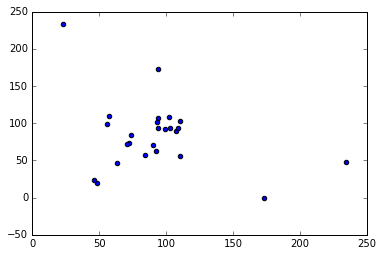

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(df['USA'], df['USA_prev'])
plt.show

<function matplotlib.pyplot.show>

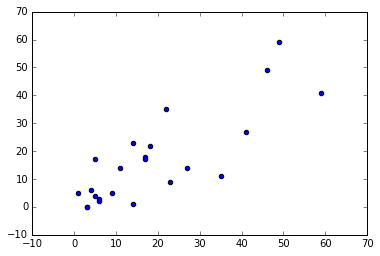

In [4]:
plt.scatter(df['AUS'], df['AUS_prev'])
plt.show

Our simplest linear regression does not seem to be a strong predictor for USA. Maybe the model works better for some other countries.

In [41]:
# Australia
aus = country_regression('AUS')
aus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AUS   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     30.65
Date:                Tue, 16 Aug 2016   Prob (F-statistic):           8.11e-07
Time:                        21:06:49   Log-Likelihood:                -80.630
No. Observations:                  23   AIC:                             167.3
Df Residuals:                      20   BIC:                             170.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -9.7858      6.386     -1.532      0.141       -23.106     3.534
num_of_events     0.1145      0.045      2.527      0.020         0.020     0.209
AUS_prev          0.4883      0.180      2.714      0.013         0.113     0.864
==============================================================================
Omnibus:                        6.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                4.259
Skew:                           0.763   Prob(JB):                        0.119
Kurtosis:                       4.455   Cond. No.                         679.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This works really well for Australia! Australia has the 10th most medals for the summer games.

In [42]:
# Great Britain
gbr = country_regression('GBR')
gbr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GBR   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.3214
Date:                Tue, 16 Aug 2016   Prob (F-statistic):              0.728
Time:                        21:09:38   Log-Likelihood:                -119.32
No. Observations:                  26   AIC:                             244.6
Df Residuals:                      23   BIC:                             248.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        30.4260     15.931      1.910      0.069        -2.529    63.381
num_of_events    -0.0330      0.078     -0.423      0.676        -0.194     0.128
GBR_prev          0.1274      0.207      0.615      0.545        -0.301     0.556
==============================================================================
Omnibus:                       47.430   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.095
Skew:                           3.394   Prob(JB):                     2.95e-50
Kurtosis:                      15.825   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show>

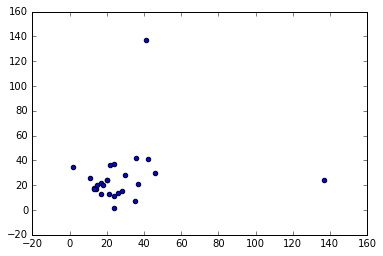

In [6]:
plt.scatter(df['GBR'], df['GBR_prev'])
plt.show

The same model performs even worse for the Great Britain. They have the 3rd most medals.

In [43]:
# China
chn = country_regression('CHN')
chn.summary()

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CHN   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     3.238
Date:                Tue, 16 Aug 2016   Prob (F-statistic):              0.146
Time:                        21:11:51   Log-Likelihood:                -27.662
No. Observations:                   7   AIC:                             61.32
Df Residuals:                       4   BIC:                             61.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -90.1564    101.178     -0.891      0.423      -371.073   190.760
num_of_events     0.5369      0.473      1.136      0.319        -0.775     1.849
CHN_prev          0.0425      0.697      0.061      0.954        -1.894     1.979
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.691
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.907
Skew:                           0.867   Prob(JB):                        0.635
Kurtosis:                       2.684   Cond. No.                     4.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is interesting. The model cannot even make sense of China. China has only competed in 7 summer olympics, but has already jumped to 8th most medals.

In [47]:
# Finland
fin = country_regression('FIN')
fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FIN   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     25.01
Date:                Tue, 16 Aug 2016   Prob (F-statistic):           2.78e-06
Time:                        21:20:47   Log-Likelihood:                -75.696
No. Observations:                  24   AIC:                             157.4
Df Residuals:                      21   BIC:                             160.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         9.8215      5.077      1.934      0.067        -0.737    20.380
num_of_events    -0.0341      0.022     -1.537      0.139        -0.080     0.012
FIN_prev          0.7127      0.132      5.413      0.000         0.439     0.987
==============================================================================
Omnibus:                        6.199   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.064
Skew:                           0.831   Prob(JB):                        0.131
Kurtosis:                       4.141   Cond. No.                         773.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finland looks to perform better than most countries with this model.

In [48]:
# France
fra = country_regression('FRA')
fra.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FRA   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.085
Method:                 Least Squares   F-statistic:                   0.05674
Date:                Tue, 16 Aug 2016   Prob (F-statistic):              0.945
Time:                        21:21:33   Log-Likelihood:                -110.33
No. Observations:                  25   AIC:                             226.7
Df Residuals:                      22   BIC:                             230.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        30.4092     13.365      2.275      0.033         2.692    58.127
num_of_events    -0.0234      0.070     -0.335      0.741        -0.168     0.121
FRA_prev          0.0483      0.387      0.125      0.902        -0.754     0.851
==============================================================================
Omnibus:                       34.822   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.421
Skew:                           2.575   Prob(JB):                     1.15e-21
Kurtosis:                      11.127   Cond. No.                         585.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show>

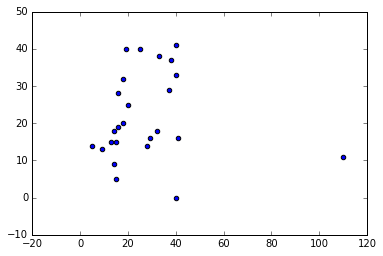

In [5]:
plt.scatter(df['FRA'], df['FRA_prev'])
plt.show

France is all over the place like Great Britain.